In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Data Symulation for one year evry 5 min
Data INDEX TimeStamp

In [2]:
# Time Paramiters DatetimeIndex
start_date = '2024-01-01 00:00:00'
end_date = '2025-01-01 00:00:00'
date_range = pd.date_range(start=start_date, end=end_date, freq='5min')

# DataFrame with Time in index
df = pd.DataFrame(index=date_range)
df.index.name = 'Timestamp'

**Key Performance Indicators (KPI) for typical noise:**
- **Success_Rate** in establishing connection: typically around **99,9%**
- **RTT_ms (Round-Trip Time)** — average network delay: approximately **45 ms**
- **Utilization_perc** — network utilization (%) around  **32,5%**

In [3]:
# rng: Random Number Generator (with fixed seed) for generating synthetic data using a normal distribution
rng = np.random.default_rng(seed=42) 
sr_base = rng.normal(99.95, 0.02, size=len(df))
df['Success_Rate'] = np.clip(sr_base, 0.0, 100.0)
base_speed = 35
rtt_base = rng.normal(base_speed, 2.5, size=len(df))
df['RTT_ms_base'] = np.clip(rtt_base, 1.0,  75.0) 
util_base = rng.normal(32.5, 1.5, size=len(df))
df['Utilization_perc'] = np.clip(util_base, 0.0, 100.0)
print (df)

                     Success_Rate  RTT_ms_base  Utilization_perc
Timestamp                                                       
2024-01-01 00:00:00     99.956094    36.646810         33.815667
2024-01-01 00:05:00     99.929200    39.949877         34.705480
2024-01-01 00:10:00     99.965009    32.147385         33.026384
2024-01-01 00:15:00     99.968811    38.934808         32.568784
2024-01-01 00:20:00     99.910979    36.942862         33.181442
...                           ...          ...               ...
2024-12-31 23:40:00     99.986619    30.923682         35.398752
2024-12-31 23:45:00     99.947281    34.847755         30.157769
2024-12-31 23:50:00     99.923113    36.224550         35.406930
2024-12-31 23:55:00     99.962655    35.036379         33.315565
2025-01-01 00:00:00     99.948722    35.733994         33.244405

[105409 rows x 3 columns]


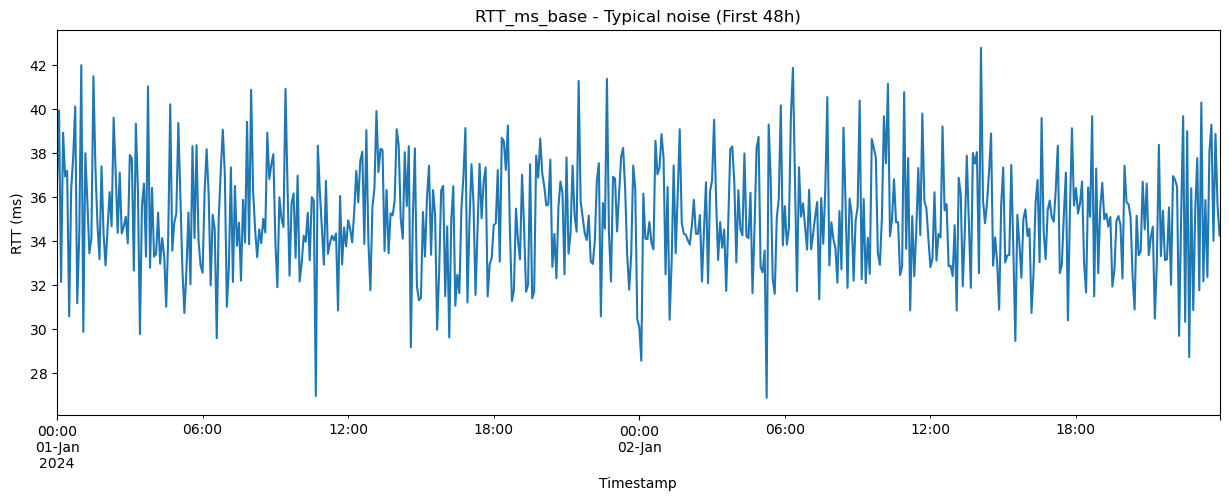

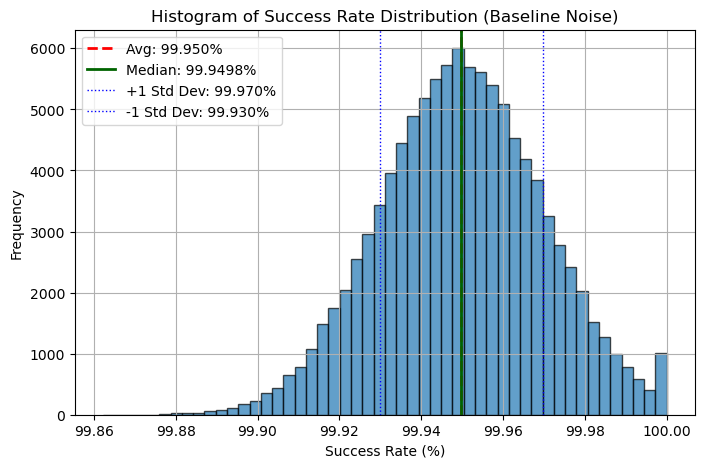

In [4]:
# LINE CHART
plt.figure(figsize=(15, 5))
df['RTT_ms_base'].head(48 * 12).plot() # 48 godzin * 12 pomiarów na godzinę
plt.title('RTT_ms_base - Typical noise (First 48h)')
plt.ylabel('RTT (ms)')
plt.show()
# HISTOGRAM
# 1. Success Rate Statistic
mean_sr = df['Success_Rate'].mean()
std_sr = df['Success_Rate'].std()
median_sr = df['Success_Rate'].median()

plt.figure(figsize=(8, 5))
df['Success_Rate'].hist(bins=50, edgecolor='black', alpha=0.7) # Ulepszona estetyka histogramu

# 2. Visualisation (Mean/Avg)
plt.axvline(mean_sr, color='red', linestyle='dashed', linewidth=2, 
            label=f'Avg: {mean_sr:.3f}%')
# 3. Visualisation (Median)
plt.axvline(median_sr, color='darkgreen', linestyle='solid', linewidth=2, 
            label=f'Median: {median_sr:.4f}%')

# 3. Visualisation (Standard Deviation +/- 1 sigma)
plt.axvline(mean_sr + std_sr, color='blue', linestyle='dotted', linewidth=1, 
            label=f'+1 Std Dev: {(mean_sr + std_sr):.3f}%')
plt.axvline(mean_sr - std_sr, color='blue', linestyle='dotted', linewidth=1, 
            label=f'-1 Std Dev: {(mean_sr - std_sr):.3f}%')

plt.title('Histogram of Success Rate Distribution (Baseline Noise)')
plt.xlabel('Success Rate (%)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**Adding Daily Seasonality Sample daily pattern:**

**Morning** (e.g., 7:00–9:00): Increased activity related to checking news, email, and social media.  
**Daytime** (e.g., 9:00–17:00): Usage levels may be lower, though there can be spikes during coffee or lunch breaks. Users may still browse the internet for work or personal purposes.  
**Evening** (e.g., 18:00–23:00): Peak activity driven by streaming movies and series, gaming, social media engagement, and listening to music.  
**Night**: Low usage levels, except for scheduled updates or background data downloads from active applications. tle

Internet Usage Activity: Morning vs Evening (Source: GUS)
Morning 1.0 (baseline activity) —
Evening 1.8–2.2 × morning +80% do +120%


## Phase Shift for Sinusoidal Peak

To align the peak of a sine wave with a specific time \( t_{\text{peak}} \), we use the general form:

$$
\alpha = 2\pi \cdot \frac{t}{T} + \phi
$$

To ensure the peak occurs at \( t = t_{\text{peak}} \), we solve:

$$
\frac{\pi}{2} = 2\pi \cdot \frac{t_{\text{peak}}}{T} + \phi
$$

Rearranging:

$$
\phi = \frac{\pi}{2} - 2\pi \cdot \frac{t_{\text{peak}}}{T}
$$


In [5]:
# Convert time index to numeric values (in minutes)
df["hour"]= df.index.hour
df["t_min"] = df.index.hour * 60 + df.index.minute

# Sinusoid parameters
amplitude = 10
period = (24/2)*60  # e.g. 2 cycles per day (in minutes)

# Phase shift to align peak at 8:00
phase_shift = np.pi / 2 - 2 * np.pi * (8 * 60) / period
print("phase_shift ",phase_shift)

# Compute sinusoid values
df["sinus"] = amplitude * np.sin((2* np.pi * df["t_min"])/ period + phase_shift) + amplitude

period_2 = 24*60
phase_shift_2 = np.pi / 2 - 2 * np.pi * (20 * 60) / period_2
amplitude_2 = 20
df["sinus_2"] = amplitude_2 * np.sin((2* np.pi * df["t_min"])/ period_2 + phase_shift_2) 
# Adjust RTT: RTT increases during peak hours
df['RTT_ms_flat'] = df['RTT_ms_base'] + df["sinus"]
df['RTT_ms_double'] = df['RTT_ms_base'] + df["sinus"]+df["sinus_2"]

phase_shift  -2.617993877991494


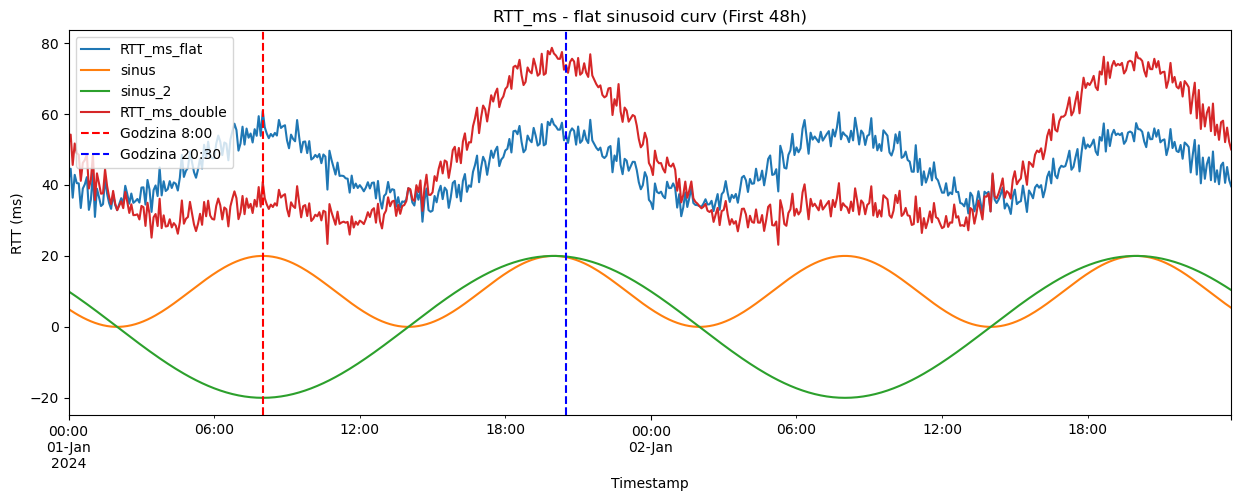

base_speed  35  amplitude_1  10  amplitude_2  20
max 8:00 35
max 20:00 75
ułamek 2.142857142857143


In [6]:
plt.figure(figsize=(15, 5))
df['RTT_ms_flat'].head(48 * 12).plot()
df["sinus"].head(48 * 12).plot()
df["sinus_2"].head(48 * 12).plot()
df['RTT_ms_double'].head(48 * 12).plot()
plt.axvline(x=pd.Timestamp("2024-01-01 08:00"), color='red', linestyle='--', label='Godzina 8:00')
plt.axvline(x=pd.Timestamp("2024-01-01 20:30"), color='blue', linestyle='--', label='Godzina 20:30')

plt.title('RTT_ms - flat sinusoid curv (First 48h)')
plt.ylabel('RTT (ms)')
plt.legend()
plt.show()
print("base_speed ",base_speed,' amplitude_1 ',amplitude," amplitude_2 ",amplitude_2)
print('max 8:00',base_speed+amplitude*2-amplitude_2)
print('max 20:00',base_speed+amplitude*2+amplitude_2)
print('ułamek',(base_speed+amplitude*2+amplitude_2)/(base_speed+amplitude*2-amplitude_2))

**Internet Usage Activity: Morning vs Evening (Source: GUS)**  
**Morning**	1.0 (baseline activity)	—  
**Evening**	1.8–2.2 × morning	+80% do +120%

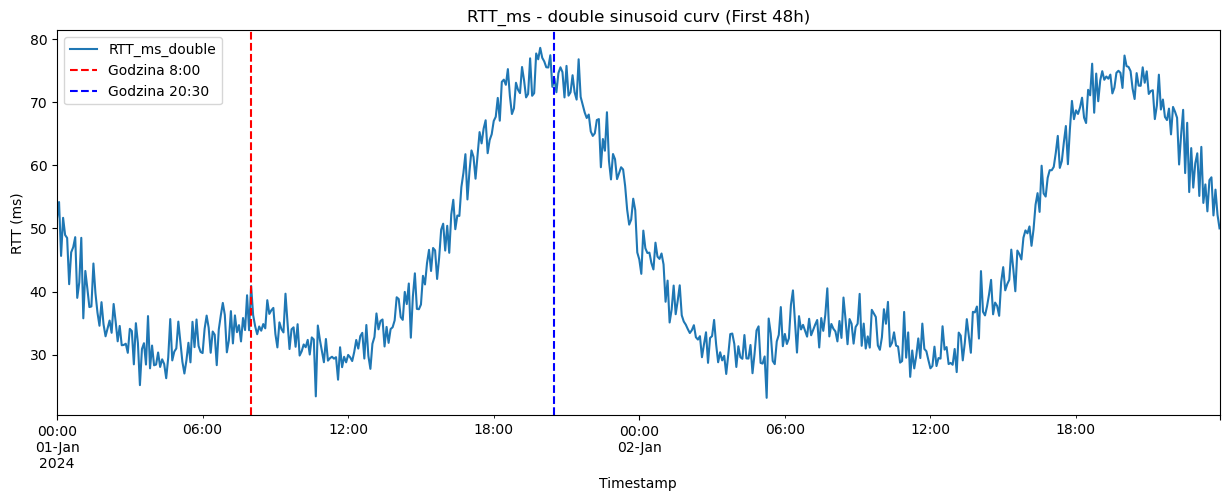

In [7]:
plt.figure(figsize=(15, 5))

df['RTT_ms_double'].head(48 * 12).plot()
plt.axvline(x=pd.Timestamp("2024-01-01 08:00"), color='red', linestyle='--', label='Godzina 8:00')
plt.axvline(x=pd.Timestamp("2024-01-01 20:30"), color='blue', linestyle='--', label='Godzina 20:30')

plt.title('RTT_ms - double sinusoid curv (First 48h)')
plt.ylabel('RTT (ms)')
plt.legend()
plt.show()

**I will introduce two main types of anomalies across different KPIs:**

**Anomaly 1: Short-Term RTT Spike**  
A sudden, short-lived increase in network latency (RTT)  
Injecting a one-time, high offset into the RTT_ms_double column.

**Anomaly 2: Sustained Drop in Success Rate**  
Decrease in the Success Rate  
Reducing the Success_Rate values to a lower constant level over several hours.

**Anomaly 1 RTT(Round-Trip Time) DELAY SPIKE**

[10.   9.4  8.8  8.2  7.6  7.   6.4  5.8  5.2  4.6  4.   3.4  2.8  2.2
  1.6  1. ]


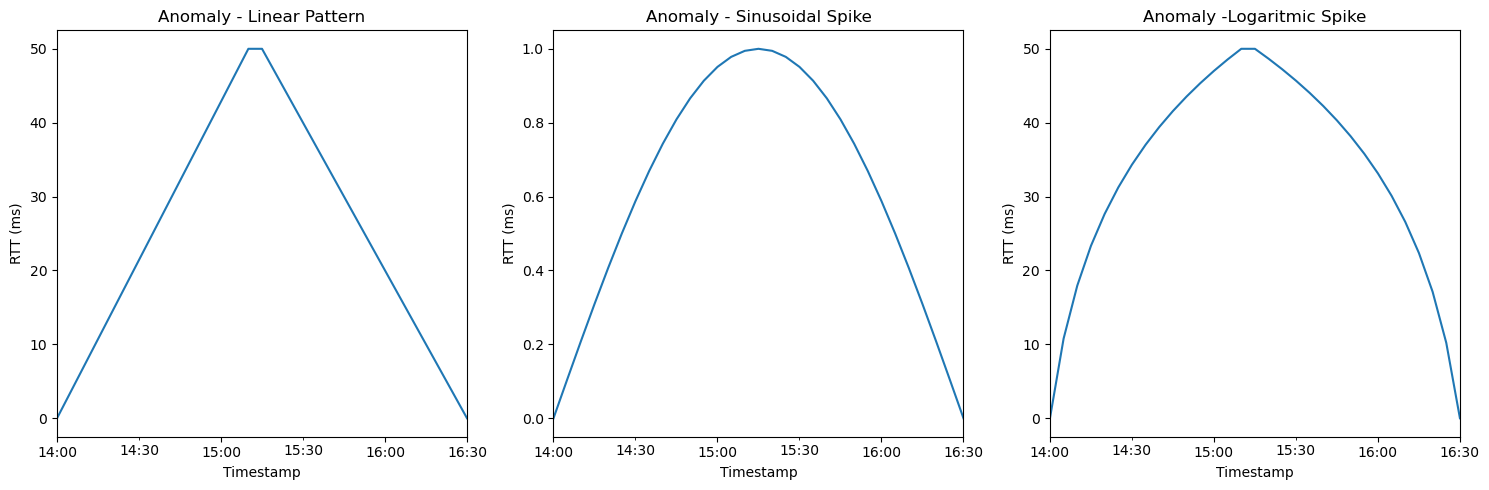

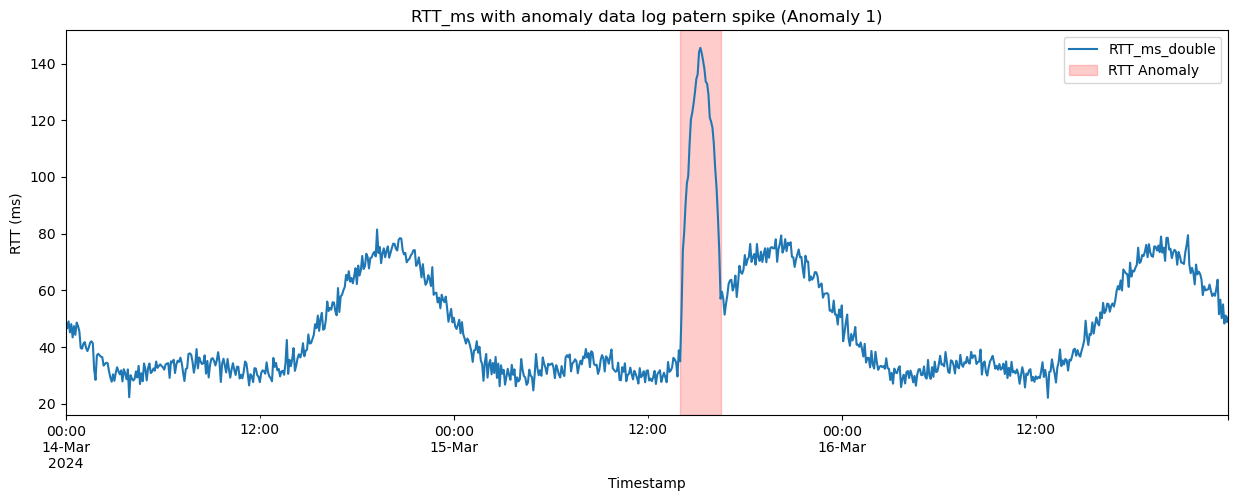

In [19]:



anomaly_1_start_rtt = '2024-03-15 14:00:00'
anomaly_1_end_rtt = '2024-03-15 16:30:00'

rtt_spike_magnitude = 50.0  # Dodajemy 50 ms opóźnienia

# dataframe with chosen rows from anaomaly reriod
df_rtt_anomaly_period = df.loc[anomaly_1_start_rtt:anomaly_1_end_rtt]
anomaly_data_logs_count = len(df_rtt_anomaly_period)

# LINEAR
list_of_values_assending_linear = np.linspace(0, rtt_spike_magnitude, int(anomaly_data_logs_count/2))
list_of_values_dissending_linear = np.linspace(rtt_spike_magnitude, 0, anomaly_data_logs_count-int(anomaly_data_logs_count/2))
list_of_values_linear = np.concatenate([list_of_values_assending_linear, list_of_values_dissending_linear])

# SIN
list_of_values_sin =np.sin(np.linspace(0, np.pi, anomaly_data_logs_count))

# LOG
x = np.linspace(1, 10, int(anomaly_data_logs_count / 2))  # start od 1, bo log(0) = -inf
list_of_values_assending_log = rtt_spike_magnitude * np.log(x) / np.log(10)
x = np.linspace(10, 1, anomaly_data_logs_count - int(anomaly_data_logs_count / 2))  # start od 1, bo log(0) = -inf
print(x)
list_of_values_dissending_log = rtt_spike_magnitude * np.log(x) / np.log(10)
list_of_values_log = np.concatenate([list_of_values_assending_log, list_of_values_dissending_log])


df.loc[anomaly_1_start_rtt:anomaly_1_end_rtt, 'anomaly data linear patern'] =list_of_values_linear
df.loc[anomaly_1_start_rtt:anomaly_1_end_rtt, 'anomaly data sin patern'] = list_of_values_sin
df.loc[anomaly_1_start_rtt:anomaly_1_end_rtt, 'anomaly data log patern'] = list_of_values_log

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# 1 lINEAR CHART
df.loc[anomaly_1_start_rtt:anomaly_1_end_rtt, 'anomaly data linear patern'].plot(ax=axes[0])
axes[0].set_title('Anomaly - Linear Pattern')
axes[0].set_ylabel('RTT (ms)')

# 2 SIN CHART
df.loc[anomaly_1_start_rtt:anomaly_1_end_rtt, 'anomaly data sin patern'].plot(ax=axes[1])
axes[1].set_title('Anomaly - Sinusoidal Spike')
axes[1].set_ylabel('RTT (ms)')

# 3 LOG CHART
df.loc[anomaly_1_start_rtt:anomaly_1_end_rtt, 'anomaly data log patern'].plot(ax=axes[2])
axes[2].set_title('Anomaly -Logaritmic Spike')
axes[2].set_ylabel('RTT (ms)')

plt.tight_layout()
plt.show()

# ANOMALY INJECTION
df['RTT_ms_double'] = df['RTT_ms_double'] + df['anomaly data log patern'].fillna(0)

# CHART RTT Anomaly
plt.figure(figsize=(15, 5))
df['RTT_ms_double'].loc['2024-03-14':'2024-03-16'].plot()
plt.axvspan(anomaly_1_start_rtt, anomaly_1_end_rtt, color='red', alpha=0.2, label='RTT Anomaly')
plt.title('RTT_ms with anomaly data log patern spike (Anomaly 1)')
plt.ylabel('RTT (ms)')
plt.legend()
plt.show()




**ANOMALY 2: Prolonged Drop in Success Rate**

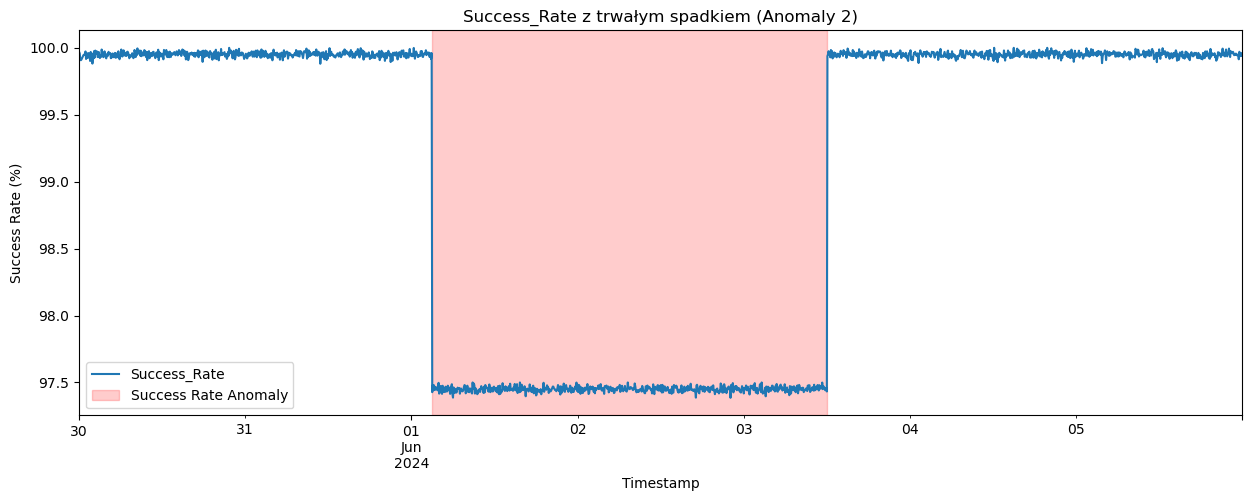

Anomaly 1 (RTT) wprowadzona od  2024-03-15 14:00:00  do  2024-03-15 16:30:00
Anomaly 2 (Success Rate) wprowadzona od  2024-06-01 03:00:00  do  2024-06-03 12:00:00


In [13]:

anomaly_2_start_SR = '2024-06-01 03:00:00'
anomaly_2_end_SR = '2024-06-03 12:00:00'
sr_drop_value = 0.5  # Drop in Success Rate by 0.5% (from 99.95% to 99.45%)

# Apply the drop
df.loc[anomaly_2_start_SR : anomaly_2_end_SR , 'Success_Rate'] -= sr_drop_value

# Ensurece Success Rate stays within [0, 100]
df['Success_Rate'] = np.clip(df['Success_Rate'], 0.0, 100.0)


# Chart Success Rate Anomaly
plt.figure(figsize=(15, 5))
df['Success_Rate'].loc['2024-05-30':'2024-06-05'].plot()
plt.axvspan(anomaly_2_start_SR, anomaly_2_end_SR, color='red', alpha=0.2, label='Success Rate Anomaly')
plt.title('Success_Rate z trwałym spadkiem (Anomaly 2)')
plt.ylabel('Success Rate (%)')
plt.legend()
plt.show()

# Logging anomaly injection
print("Anomaly 1 (RTT) introduced from " ,anomaly_1_start_rtt," to ",anomaly_1_end_rtt)
print("Anomaly 2 (Success Rate) introduced from ", anomaly_2_start_SR," to ",anomaly_2_end_SR)

**Data selection**

In [17]:
selected_columns = ['RTT_ms_double', 'Success_Rate']
df_selected = df[selected_columns].copy()
df_selected.rename(columns = {'RTT_ms_double': 'RTT_ms'}, inplace=True)
print(df_selected)

                        RTT_ms  Success_Rate
Timestamp                                   
2024-01-01 00:00:00  51.646810     99.956094
2024-01-01 00:05:00  54.196656     99.929200
2024-01-01 00:10:00  45.646593     99.965009
2024-01-01 00:15:00  51.692967     99.968811
2024-01-01 00:20:00  48.967351     99.910979
...                        ...           ...
2024-12-31 23:40:00  48.975010     99.986619
2024-12-31 23:45:00  52.132326     99.947281
2024-12-31 23:50:00  52.744360     99.923113
2024-12-31 23:55:00  50.794358     99.962655
2025-01-01 00:00:00  50.733994     99.948722

[105409 rows x 2 columns]


**Saving data to a CSV file**

In [ ]:
import os

filename = 'RTT_SR_with_anomalys.csv'

if os.path.exists(filename):
    print("File", filename, "already exists — it will be overwritten.")
else:
    print("Creating new file:", filename)

df_selected.to_csv(filename, index=True)